             id  week  center_id  meal_id  checkout_price  base_price  \
0       1379560     1         55     1885          136.83      152.29   
1       1466964     1         55     1993          136.83      135.83   
2       1346989     1         55     2539          134.86      135.86   
3       1338232     1         55     2139          339.50      437.53   
4       1448490     1         55     2631          243.50      242.50   
...         ...   ...        ...      ...             ...         ...   
489116  1250239   155         61     1543          482.09      484.09   
489117  1039516   155         61     2304          483.09      483.09   
489118  1158107   155         61     2664          322.07      323.07   
489119  1444235   155         61     2569          322.07      323.07   
489120  1291286   155         61     2490          276.45      276.45   

        emailer_for_promotion  homepage_featured  num_orders  
0                           0                  0       177.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

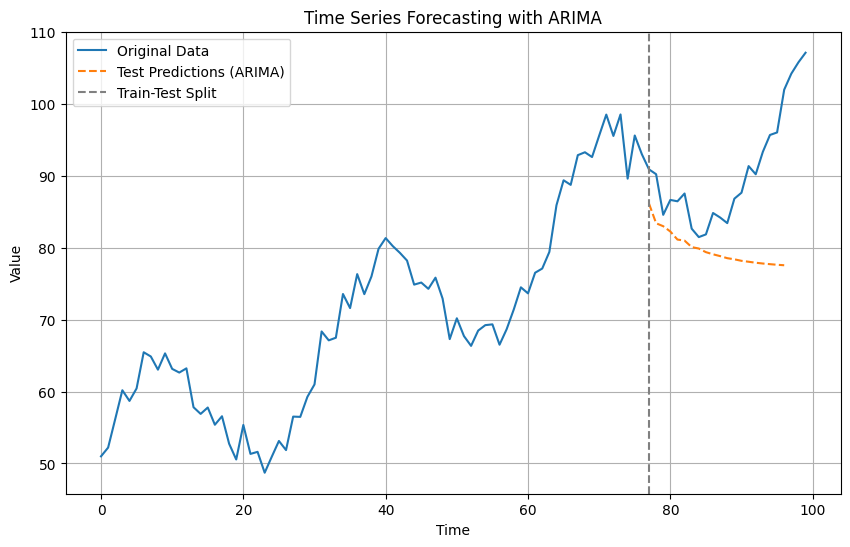

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


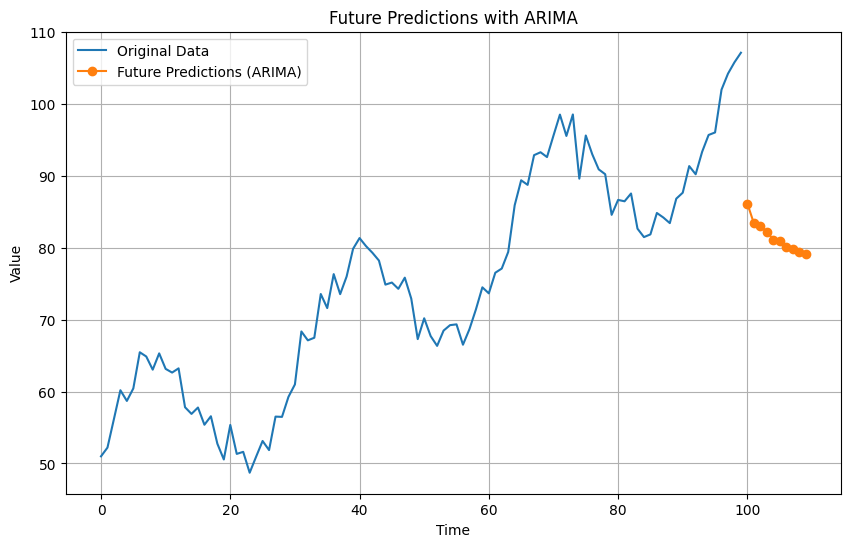

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error



file1 = pd.read_csv('/content/train.csv')
file2 = pd.read_csv('/content/test.csv')
combined = pd.concat([file1, file2], ignore_index=True)
combined.to_csv('combined.csv', index=False)

print(combined)
print(file1.columns)
print(file2.columns)

merged = pd.merge(file1, file2, on='id', how='inner')
merged.to_csv('combined.csv', index=False)
print(merged)


joined = pd.concat([file1, file2], axis=1)
joined.to_csv('joined.csv', index=False)
print(joined)


np.random.seed(42)
data_length = 100
time = np.arange(data_length)
values = 50 + 0.5 * time + np.sin(time / 5) * 10 + np.random.normal(scale=2, size=data_length)

data = pd.DataFrame({'time': time, 'value': values})


lag = 3
for i in range(1, lag + 1):
    data[f'lag_{i}'] = data['value'].shift(i)

data.dropna(inplace=True)

X = data[['lag_1', 'lag_2', 'lag_3']]
y = data['value']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)


train_series = y_train


arima_model = ARIMA(train_series, order=(3, 1, 2))  # Example: p=3, d=1, q=2
arima_fitted = arima_model.fit()

y_pred_train_arima = arima_fitted.predict(start=0, end=len(y_train)-1, typ='levels')
y_pred_test_arima = arima_fitted.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, typ='levels')


print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train_arima)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_arima)))
print("R2 Score:", r2_score(y_test, y_pred_test_arima))
plt.figure(figsize=(10, 6))
plt.plot(time, values, label='Original Data')
plt.plot(time[len(X_train):len(X_train) + len(y_test)], y_pred_test_arima, label='Test Predictions (ARIMA)', linestyle='--')
plt.axvline(x=time[len(X_train)], color='gray', linestyle='--', label='Train-Test Split')
plt.legend()
plt.title('Time Series Forecasting with ARIMA')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid()
plt.show()


future_steps = 10
future_predictions_arima = arima_fitted.forecast(steps=future_steps)

# Plot future predictions
plt.figure(figsize=(10, 6))
plt.plot(time, values, label='Original Data')
plt.plot(range(time[-1] + 1, time[-1] + 1 + future_steps), future_predictions_arima, label='Future Predictions (ARIMA)', marker='o')
plt.legend()
plt.title('Future Predictions with ARIMA')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid()
plt.show()



In [28]:

y_test_actual = y_test.values
y_pred_test = y_pred_test_arima
# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_test))


mas = np.mean(np.abs(y_test_actual - y_pred_test))

# Print the results
print(f"RMSE: {rmse}")
print(f"MSE: {mean_squared_error(y_test_actual, y_pred_test)}")  # You can also print the MSE for reference
print(f"MAS: {mas}")


RMSE: 14.762066351640101
MSE: 217.91860297022487
MAS: 11.172514800649456


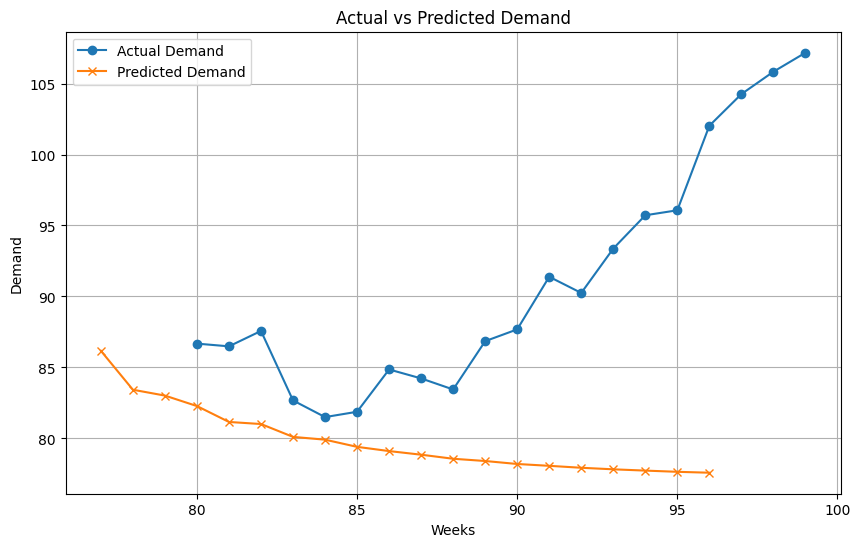

In [29]:
import matplotlib.pyplot as plt

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual Demand", marker='o')
plt.plot(y_pred_test, label="Predicted Demand", marker='x')
plt.legend()
plt.title("Actual vs Predicted Demand")
plt.xlabel("Weeks")
plt.ylabel("Demand")
plt.grid(True)
plt.show()

Linear Regression RMSE: 2.6212
Linear Regression R²: 0.8939
XGBoost RMSE: 6.9757
XGBoost R²: 0.2483


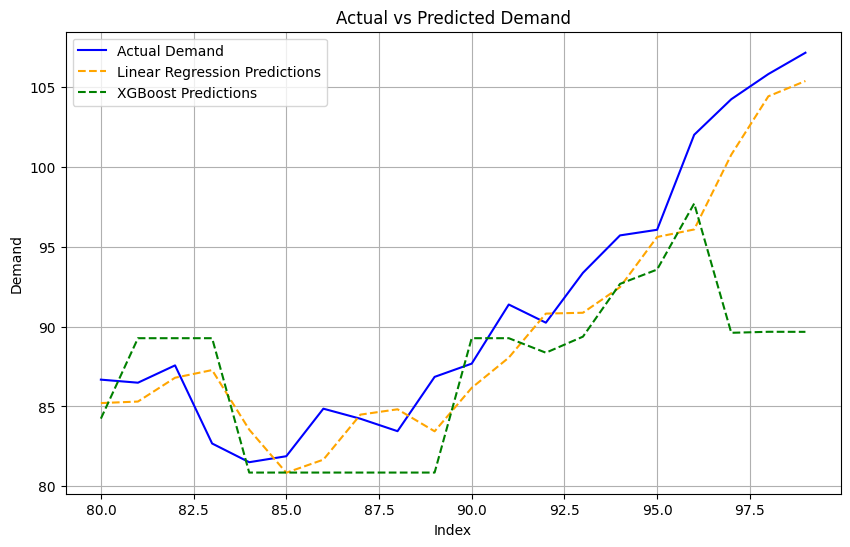

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Step 2: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Step 3: Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Step 4: Train XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Step 5: Make predictions with both models
y_pred_lr = lr_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Step 6: Evaluate models using RMSE and R²
# Linear Regression Evaluation
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# XGBoost Evaluation
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print results
print(f"Linear Regression RMSE: {rmse_lr:.4f}")
print(f"Linear Regression R²: {r2_lr:.4f}")
print(f"XGBoost RMSE: {rmse_xgb:.4f}")
print(f"XGBoost R²: {r2_xgb:.4f}")

# Step 7: Visualize predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Demand', color='blue')
plt.plot(y_test.index, y_pred_lr, label='Linear Regression Predictions', color='orange', linestyle='--')
plt.plot(y_test.index, y_pred_xgb, label='XGBoost Predictions', color='green', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted Demand')
plt.xlabel('Index')
plt.ylabel('Demand')
plt.grid(True)
plt.show()
